In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
from nyu_finger import NYUFingerReal
from IPython.display import display, clear_output

np.set_printoptions(suppress=True, precision=3)

# change this line of code to selectively run fingers
# for example, if finger1 needs to be run only, type ([1,0,0]) below
robotid=np.array([1,0,0])
robot1id=robotid[0]
robot2id=robotid[1]
robot3id=robotid[2]


def generate_test_trajectory(t,A,T):
    q_des=np.zeros(3)
    v_des=np.zeros(3)
    q_des=A*np.sin(2*np.pi/T*t)
    v_des=A*2*np.pi/T*np.cos(2*np.pi/T*t)
    return q_des,v_des

def compute_PD_torque(q_des,v_des,q,v,P,D):
    tau=P*(q_des-q)+D*(v_des-v)
    return tau


In [2]:
robot1 = NYUFingerReal()
robot1.initialize('eth3', [1,2,0])
robot2 = NYUFingerReal()
robot2.initialize('ens4f0', [2,0,1]) 



robot3= NYUFingerReal()
robot3.initialize('ens4f1', [0,1,2])



In [3]:

P = 3.5
D = 0.05

traj_time=2*100000

traj_des_pos = np.zeros((traj_time, 3))
traj_pos = np.zeros((traj_time, 3))

i = 0

try:
    start = time.time()
    while True:
        t = time.time()
        
        q_des1,v_des1=generate_test_trajectory(t,0.2,2)
        q_des2,v_des2=generate_test_trajectory(t,0.2,2)
        q_des3,v_des3=generate_test_trajectory(t,0.2,2)
        
        
    
        
        q1, v1 = robot1.get_state()
        q2, v2 = robot2.get_state()
        q3, v3 = robot3.get_state()

        
        # Recording
        traj_des_pos[i] = q_des1
        traj_pos[i] = q1
        
        tau1=compute_PD_torque(q_des1,v_des1,q1,v1,P,D)
        tau2=compute_PD_torque(q_des2,v_des2,q2,v2,P,D)
        tau3=compute_PD_torque(q_des3,v_des3,q3,v3,P,D)
        

        
        
        if robot1id==1:
            robot1.send_joint_torque(tau1)
        else:
            pass
        
        
        
        if robot2id==1:
            robot2.send_joint_torque(tau2)
        else:
            pass
        
        
        
        if robot3id==1:
            robot3.send_joint_torque(tau3)
        else:
            pass
        
        
        
        robot1.step()
        
        i += 1
except KeyboardInterrupt:
    print('interrupted!')

end = time.time()
    
# Need to send zero torques. Otherwise the safety mode on the card kicks in
# and the card goes into error mode.
# robot.send_target_joint_torque(np.array([0., 0., 0.]))
# robot1.send_target_joint_torque(np.array([0., 0., 0.]))
# robot2.send_target_joint_torque(np.array([0., 0., 0.]))

interrupted!


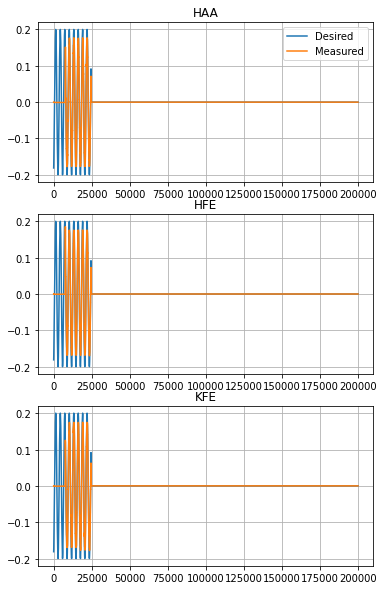

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

for i, (ax, label) in enumerate(zip(axes, ['HAA', 'HFE', 'KFE'])):
    ax.plot(traj_des_pos[:, i], label='Desired')
    ax.plot(traj_pos[:, i], label='Measured')
    ax.grid(True)
    ax.set_title(label)
    
axes[0].legend()